# Multiple Linear Regression With ScikitLearn
**Author**: Tan Li Tung

**Machine learning** is a method used to iteratively learn from data without being explicitly programmed by humans. It is very useful when we want to find a pattern that lies within a large dataset.

There are two types of machine learning problem, which are the **Regression** and **Classification** problem. In short, regression problem returns a value (example: the extimated price of a house), while classfication problem returns a category (exmaple: cat or dog).

In this notebook, we will focus on **Multiple Linear Regression** using a library called `ScikitLearn`.

We will use a dataset called KC House Data. 

- To download the dataset, get it [here](https://github.com/tanlitung/Datasets/blob/master/kc_house_data.csv)

- To import directly to pandas, use this URL: https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv

# Objective

In this section, we want to predict the house price based on the features.

In [1]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# to plot the diagrams within the cells
%matplotlib inline

In [2]:
# Load the kc housing dataset
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Description of Variables

Features
*********
- **id**: ID of the house
- **date**: Data of house sold
- **bedrooms**: Number of bedrooms
- **bathroooms**: Number of bathrooms
- **sqft_living**: Square footage of house
- **sqft_lot**: Square footage of lot
- **floors**: Number of floors/ Level
- **waterfront**: 1 = Waterfront view; 0 = No waterfront view
- **view**: 1 = House been viewed; 0 = House has not been viewed
- **condition**: 1 indicates worn out property and 5 excellent
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
- **sqft_above**: Square footage of house apart from basement
- **sqft_below**: Square footage of the basement
- **yr_built**: Year of house built
- **yr_renovated**: Year of house renovated
- **zipcode**: Zip code
- **lat**: Latitude coordination
- **long**: Longitude coordination
- **sqft_living**: Square footage of house in 2015 (implies-- some renovations)
- **sqft_lot**: Square footage of lot in 2015 (implies-- some renovations)

Target
********
- **price**: Price of house sold

# Omit ID and Date columns

In [4]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)

This is a nice dataset since it does not have any missing values. However, let's try to explore somethign from the dataset before we build the model.

**Let us only take the columns we find relevant. ID columns and date columns may not be relevant. As our model is very simple, let us also omit the ID and date although more sophisticated models can definitely take advantage of them.**

Disclaimer: In house prices cases, date might be relevant in some datasets as house prices are subject to change based.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Normalizing Data for Comparison
In Machine Learning, we often need to deal with normalization. Normalization is the process of scaling the data to the range of 0 to 1. In this exercise, we will use `MinMaxScaler()`.

The calculation of `MinMaxScaler()` is as below:
$$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Example (First value of bedrooms):
$$X_{sc} = \frac{3 - 0}{33 - 0}$$

$$X_{sc} = 0.090909$$

In [28]:
from sklearn import preprocessing

# Scale and plot the features against price (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('price', axis = 1).columns[:]
x = df.loc[:, col_name]
y = df['price']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

# Examine the normalized data
print(df.head())
x.head()

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


Now, we would like to examine the relationship of each feature against the target (price). We can do this through `sns.regplot()`. `regplot()` will also try to draw a best fit line to show the linear relationship between each feature and the target.

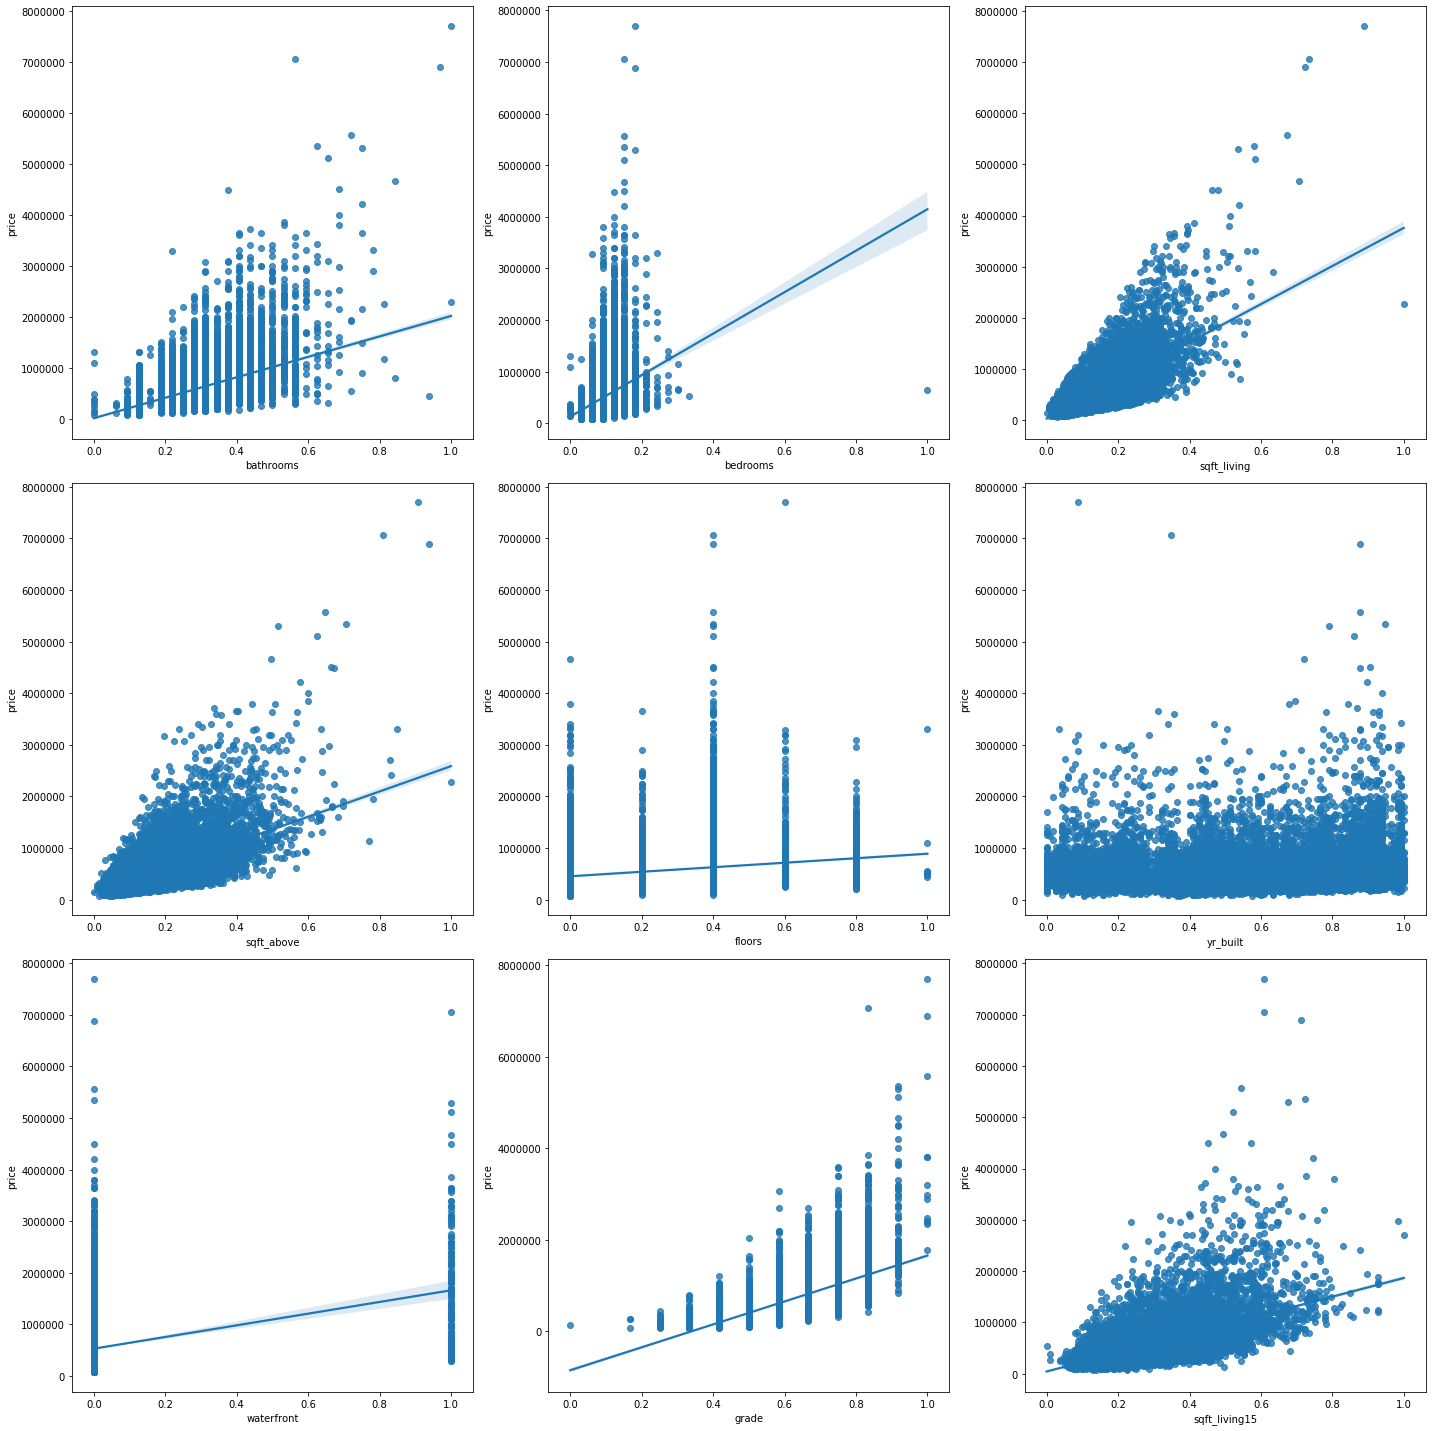

In [31]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = df['price'], x = x['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = x['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = x['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = x['sqft_above'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = x['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = x['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = x['waterfront'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = x['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = x['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

Simpler way to write the above code - For jupyter notebook users, click on the image to zoom the image

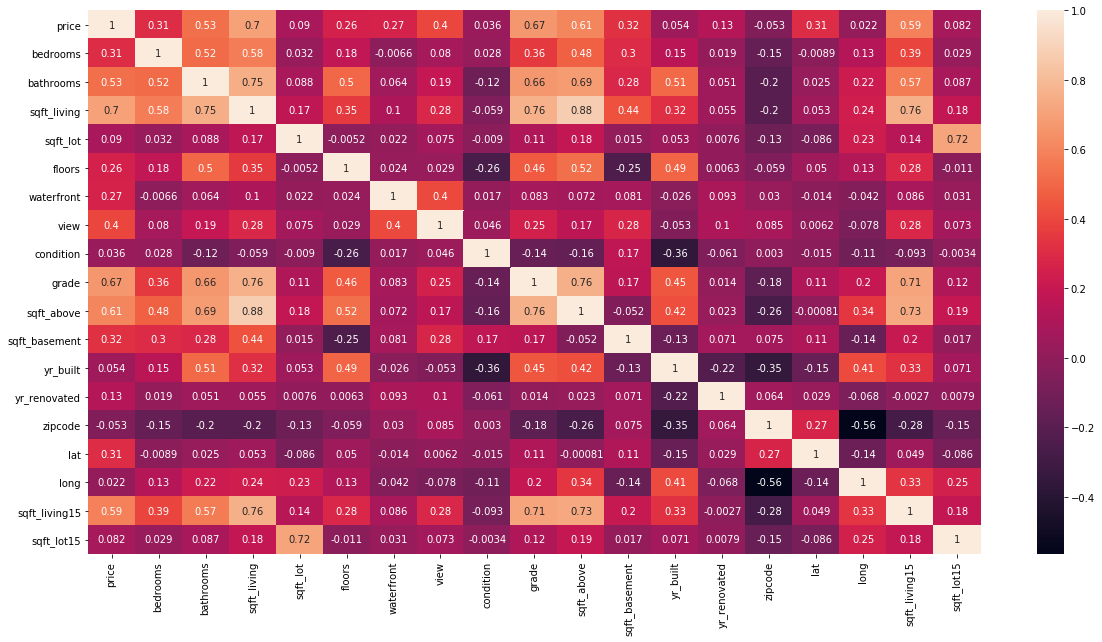

In [11]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Next, we will split the dataset into training set and testing set. This can be done by using the function `train_test_split` from `Scikit Learn`.

*There is no standard on how to do the splitting, but generally, people use 60 - 80% for training and 20 - 40% for testing.*

**Syntax and Paramenters**: train_test_split(features_dataset, target_dataset, test_size, random_state)
- features_dataset: the input dataset to the model
- target_dataset: the output dataset to the model
- test_size: the percent of data that you want to use for testing, usually from (0.2 - 0.4)
- random_state: randomly split the train and test dataset

# Split The Data and Train The Model

In [9]:
features = df.drop('price', axis = 1)
target = df['price']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 5)
print("Train features shape : ", train_features.shape)
print("Train target shape   : ", train_target.shape)
print("Test features shape  : ", test_features.shape)
print("Test target shape    : ", test_target.shape)

Train features shape :  (17290, 18)
Train target shape   :  (17290,)
Test features shape  :  (4323, 18)
Test target shape    :  (4323,)


Once again, we will use the `LinearRegression()` model in this case and we fit the `train_features` and `train_target` to the model.

**NOTICE:** There is a parameter `normalized = True`, this enables the data to be normalized when fed into the model!

# Model Building

In [10]:
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Interpret The Model

Now the model has generated a LinearRegression model for us. Recall that a LinearRegression model consist of coefficient(s) and intercept. We can now have a look at the intercept and coefficients for our model and interpret them.

In [11]:
print("Model intercept  : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(features.columns)):
    print(features.columns[i], ": ", model.coef_[i])

Model intercept  :  4885194.015871109 

Model coefficient:  [-3.41051487e+04  3.99211786e+04 -2.58757456e+03  1.26478128e-01
  5.33987195e+03  5.80487816e+05  5.35040293e+04  2.73331959e+04
  9.63305323e+04  2.76922289e+03  2.73674117e+03 -2.63338492e+03
  2.52026883e+01 -5.54455479e+02  6.02529710e+05 -2.07308756e+05
  2.01439122e+01 -3.84507098e-01] 

bedrooms :  -34105.14872610108
bathrooms :  39921.17861710444
sqft_living :  -2587.574560419718
sqft_lot :  0.12647812775768616
floors :  5339.87194839452
waterfront :  580487.8156734094
view :  53504.02931923726
condition :  27333.195886131216
grade :  96330.5323209636
sqft_above :  2769.222892988167
sqft_basement :  2736.7411715825433
yr_built :  -2633.3849222372564
yr_renovated :  25.202688266615695
zipcode :  -554.4554793058425
lat :  602529.7099847184
long :  -207308.75551896502
sqft_living15 :  20.14391223115794
sqft_lot15 :  -0.3845070978801777


Now you are able to see the coefficients and the intercept. What does it means? It means the model can be mathematically express as:
$$Price = 4885194.02 - 34105.15 * bedrooms + 39921.18 * bathrooms - 2587.57 * sqft_{living} + ... $$

Compare it to the general equation:
$$y = \beta_0 + \beta_{1}x + \beta_{2}x + \beta_{3}x + \beta_{4}x + ... + \beta_{n}x$$

In [12]:
# Model evaluation for training set
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price     Predicted     Difference
3856    535000.0  6.568467e+05  121846.663826
5010    425000.0  2.880304e+05 -136969.567857
18050   800000.0  1.041330e+06  241330.384616
570     338900.0  1.797743e+05 -159125.738118
8556   1110000.0  1.122411e+06   12411.219660
19435   333000.0  4.801479e+05  147147.907190
16918   830000.0  8.114510e+05  -18548.967652
21010   525000.0  5.585742e+05   33574.160662
6156    375000.0  3.682123e+05   -6787.733889
10074   333760.0  3.485609e+05   14800.947067 

Model training performance:
---------------------------
RMSE is 201016.80578429985
R2 score is 0.699631721212128


          price     Predicted     Difference
17485  365000.0  4.280495e+05   63049.478229
15164  225000.0  9.861129e+04 -126388.707462
18449  384950.0  4.832986e+05   98348.646509
6828   657500.0  5.908904e+05  -66609.583049
18281  959000.0  1.195190e+06  236189.880048
14625  855000.0  8.805543e+05   25554.290965
14864  575000.0  6.394081e+05   64408.126046
17257  856500.0  

Now we see that the $R^2$ score of our model is just 0.699, and the difference between the actual and the predicted value is high. Why is this happenning?

1. The data is too disperse.
2. Some of the variables might not have a linear relationship with price.
3. Some data can be cleaned further (Example: year built, zipcode)

**How to solve?**
1. Clean the data using the techniques you learnt! (Outliers, Invalid data)
2. Try out other models!
3. Play around with the train_test_split ratio.

# Conclusion
We have covered from a simple $y = \beta_0 + \beta_1 x $ linear regression to multiple linear regression! This sums up the topic of linear regression. However, you can always learn more about ScikitLearn at the [ScikitLearn Official Documentation](https://scikit-learn.org/stable/).

# Things to Remember
Data Science is not all about Python and all the fantastic libraries. It is about how you gain valueable insights or knowledge from the data to assist you or your organization in making better decision! Python is just one of the tools to achieve that!

# What's Next

1. Try to apply what you learn on different datasets! Here are some awesome [datasets](https://scikit-learn.org/stable/datasets/index.html) you can use to try it out! 

2. Try out different models other than `LinearRegression()`. There are a lot to explore such as:
    - DecisionTreeRegressor
    - KNeighborsRegressor
    - GradientBoostingRegressor
    - Lasso
    - Elastic Net
    
All the model can be found on the [ScikitLearn Official Documentation](https://scikit-learn.org). Examine their $R^2$ score, mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE) and compare it with `LinearRegression` model!

Good luck and all the best!